# 2 _k_-Means Clustering


In this notebook, we will explore and cluster data with the _k_-Means algorithm.

In _k_-Means, a dataset is partitioned in _k_ clusters while trying to minimize the sum of squared distances of each point to its cluster center. One of the characteristics of this algorithm is that the number of clusters _k_ is predefined, i.e., the choice is left to the machine learning practitioner.

You can find an overview of the algorithm in the lecture slides.

As usual, we start with importing the packages:


In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

np.random.seed(1337)  # seeds help with reproducible results
%matplotlib inline

## 2.1 The Dataset

We are going to use a familiar dataset, the [Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).
The dataset contains four features: sepal length, sepal width, petal length and petal width. We want to be able to look at our clustering results later. Four-dimensional data are hard to visualize for human brains. Thankfully, we know a handy dimensionality reduction technique, i.e., Principal Component Analysis (PCA).


### Task 2.1.1 Transform the Data

1.  Load the Iris Dataset.
2.  Use the PCA class from sklearn to project the dataset into a two-dimensional space.


In [3]:
# load iris dataset
iris = load_iris()

pca = PCA(n_components=2)
pca.fit(iris.data)
data = pca.transform(iris.data)

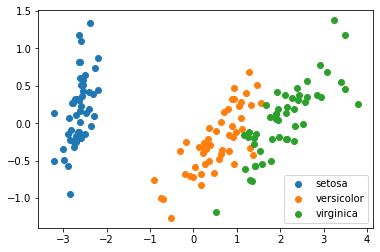

In [4]:
# just a quick visualization of the data to see the PCA results

fig, ax = plt.subplots()

for g in np.unique(iris.target):
    ax.scatter(
        data[iris.target == g, 0], data[iris.target == g, 1], label=iris.target_names[g]
    )

ax.legend()

## 2.2 Initialization

Before we start with the learning phase, we need to set up a few initial parameters.


### Task 2.2.1 The _k_-Question

As mentioned, the choice of the right _k_ is an important decision for the success of the algorithm. The number of clusters you will retrieve in the end depends on _k_. Too many or too few clusters might give you suboptimal results.

Fortunately, we know that the Iris Dataset is labeled. Those labels already partition the data. Therefore, let's choose _k_ according to the number of labels.


In [5]:
k = len(iris.target_names)

### Task 2.2.2 The First Cluster Centers

You have to start somewhere! Theoretically, you could choose arbitrary points in the input space. Unfortunately, if we choose those randomly, the algorithm might take a while to converge.

In order to speed things up a little, let's choose different random datapoints from the dataset as the initial cluster centers.

_Hint: `numpy.random` has a few good functions for that purpose._


In [6]:
c_is = np.random.choice(iris.target, size=k, replace=False)

## 2.3 The Algorithm

Now the algorithm goes as follows:

    - obtain the distance of each point to each cluster center
    - assign that point to the nearest cluster
    - move position of centre to mean of points in cluster

Thus, we need a few calculation steps. Note that the use of libraries outside the Python Standard Library and `numpy` is not allowed in the following tasks, unless stated otherwise.


### Task 2.3.1 Compute the Distances

Complete the function `distances(...)` that takes a list/array of datapoints and a list/array of cluster centers and returns the distance of each data point to each cluster center.


In [7]:
def distances(data, centroids):
    return [[np.sqrt(np.sum((c - p) ** 2)) for c in centroids] for p in data]

### Task 2.3.2 Assign Data Points to Clusters

Now that we can compute the distances to the cluster centres, we need to assign the points to their respective clusters.

Complete the function `compute_assignments(...)` that takes a list/array of data points and a list/array of cluster centers and returns a list of assignments of each data point to the nearest cluster center.

_Hint: Make ample use of the `distances(...)` function you just wrote._


In [8]:
def compute_assignments(data, centroids):
    return np.argmin(distances(data, centroids), axis=1)

In [9]:
compute_assignments(data, c_is)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 2, 1, 2, 0, 2,
       0, 0, 0, 1, 0, 0, 0, 2, 2, 1, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

### Task 2.3.3 Update Cluster Centers

Now that we have our clusters, we can compute new centers that better represent the cluster.

Complete the function `update_centers()` that takes takes a list/array of data points and a list/array of assignments and returns the new cluster centers.


In [10]:
def update_centers(data, assignments):
    return [np.mean(data[assignments == i]) for i in range(k)]
    # your code here

The most important parts are done! Theoretically, we only need to run the algorithm repeatedly until the cluster centers do not change anymore.


## 2.4 Cluster Quality

As we have seen in previous assignments, blindly running an algorithm without evaluating the quality of its results is not always the best idea.

Hence, we will use the Davies Bouldin (DB) Index to evaluate the quality of our clusters (see also the theory about the DB index in the lecture).

### Task 2.4.1 The Davies-Bouldin Index

Write a function `db_index(...)` that takes a list/array of data points, a list/array of cluster centers, and a list/array of assignments and returns the Davies-Bouldin Index.

You will need to:

    - calculate the radii of the clusters, R
    - calculate the inter class distance between the clusters
    - calculate the badness of separation between the clusters, D

Lastly, you need to take the average over the relevant D-values of each cluster.

All necessary formulas can be found in Lecture 19 (_Basic Clustering_).


In [11]:
def db_index(data, centroids, assignments):
    radii = [
        np.sqrt(
            np.sum([(p - centroids[c_idx]) ** 2 for p in data[assignments == c_idx]])
            / len(data[assignments == c_idx])
        )
        for c_idx in range(k)
    ]

    distances_worst = [
        np.max(
            [
                (radii[c1_idx] + radii[c2_idx])
                / np.abs(centroids[c1_idx] - centroids[c2_idx])
                for c2_idx in range(k)
                if c1_idx != c2_idx
            ]
        )
        for c1_idx in range(k)
    ]

    return np.sum(distances_worst) / k

In [12]:
db_index(data, c_is, compute_assignments(data, c_is))

3.3009105413453965

## 2.5 Learning Phase


### Task 2.5.1 Iterative Clustering

Finally, we have all the ingredients in order to cluster our data. Remember, we already initialized the first cluster centers.

Therefore, for 20 iterations, you will need to:

    - compute the cluster assignments
    - compute the new cluster centres according to the assignments
    - compute the DB index for the current assignments and cluster centers

Do not forget to log relevant data for each iteration:

    - the cluster centers
    - the cluster assignments
    - the DB-Index


In [13]:
logs = {
    "centers": [c_is],
    "assignemnts": [compute_assignments(data, c_is)],
    "loss": [db_index(data, c_is, compute_assignments(data, c_is))],
}
iterations = 20

for _ in range(iterations):
    assignemnts = compute_assignments(data, c_is)
    c_is = update_centers(data, assignemnts)

    logs["centers"].append(c_is)
    logs["assignemnts"].append(assignemnts)
    logs["loss"].append(db_index(data, c_is, compute_assignments(data, c_is)))

## 2.6 Evaluation


### Task 2.6.1 Plotting the DB-Index

Plot the DB Index over the iterations. Don't forget to add title, axis ticks, and axis labels to the plot!


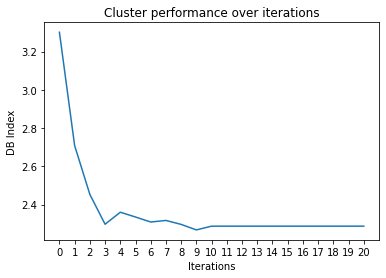

In [14]:
plt.plot(logs["loss"])
plt.xlabel("Iterations")
plt.ylabel("DB Index")
plt.xticks(range(iterations + 1))
plt.title("Cluster performance over iterations")
plt.show()

## Comment: These DB index values seem very high, but the results look fine,
## and the progression also look fine

### Task 2.6.2 Clustered Data vs. Labeled Data

In the beginning, we told our _k_-Means algorithm to separate the data into _k_ clusters after determining _k_ based on the number of cluss labels in the dataset.

Create two plots side-by-side (using subplots), where one side is showing the clustered data and the other side is showing the partitions of the labeled data.


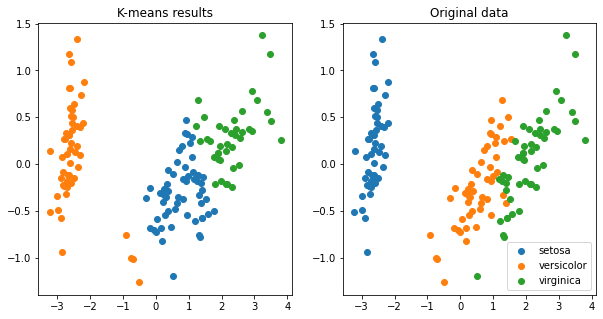

In [15]:
# create two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2)

# plot kmeans results

assigs = logs["assignemnts"][-1]

for g in np.unique(assigs):
    ax1.scatter(
        data[assigs == g, 0],
        data[assigs == g, 1],
    )
ax1.set_title("K-means results")

# plot original

for g in np.unique(iris.target):
    ax2.scatter(
        data[iris.target == g, 0], data[iris.target == g, 1], label=iris.target_names[g]
    )

ax2.set_title("Original data")
ax2.legend()

# make subplots square
fig.set_size_inches(10, 5)
plt.show()

## 2.7 _k_-Means in the Wild

It is quite fun to write the _k_-Means algorithm bottom-up. But, usually, a practitioner would rely on libraries, which have already implemented the algorithm, if possible.
_k_-Means is implemented in the `scikit-learn` library, so we are going to use it to cluster somewhat more complex data and visualize the cluster centers.


In [16]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans

### Task 2.7.1 Digits Data and the _k_-Question

Load the [Digits Dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#digits-dataset) and decide on a reasonable number of cluster centers.


In [17]:
# load digits dataset
digits = load_digits()
k = 10

### Task 2.7.2 Run the _k_-Means Algorithm

Use the provided _k_-Means object on the digits data and extract the cluster centers.


In [18]:
model = KMeans(n_clusters=k)
model.fit(digits.data)
centers = model.cluster_centers_

### 2.7.3 Plot the Cluster Centers

Plot all the extracted cluster centers as images.


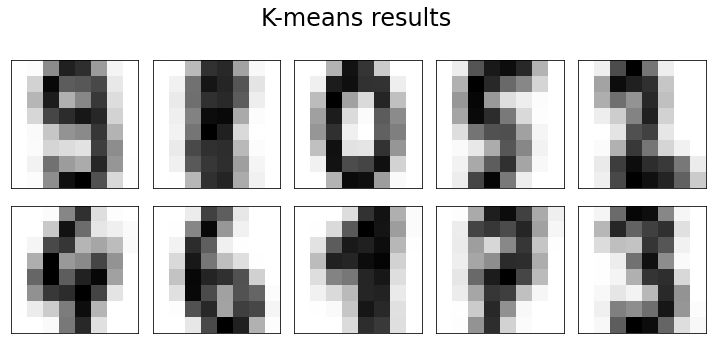

In [54]:
# make 10 subplots
fig, axes = plt.subplots(2, 5)
for i, ax in enumerate(axes.flat):
    ax.imshow(np.reshape(centers[i], (-1, 8)), cmap="gray_r")
    ax.set_xticks([])
    ax.set_yticks([])

fig.set_size_inches(10, 5)
fig.set_tight_layout(True)
fig.suptitle("K-means results", fontsize=24)
plt.show()